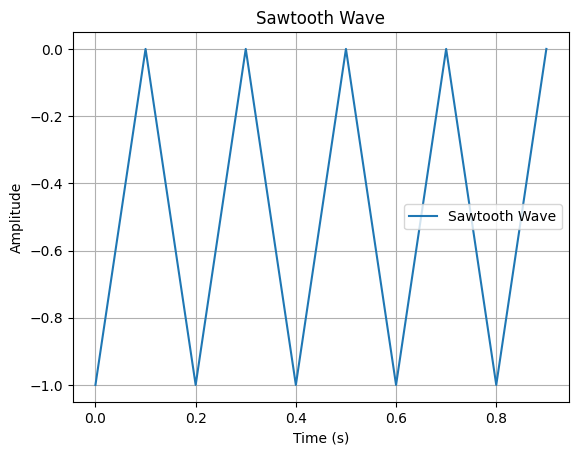

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
#Parameters
f = 5  # Frequency (Hz)
fs = 10
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector


sawtooth_wave = sawtooth(2 * np.pi * f * t)

# Plotting
plt.plot(t, sawtooth_wave, label="Sawtooth Wave")
plt.title("Sawtooth Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

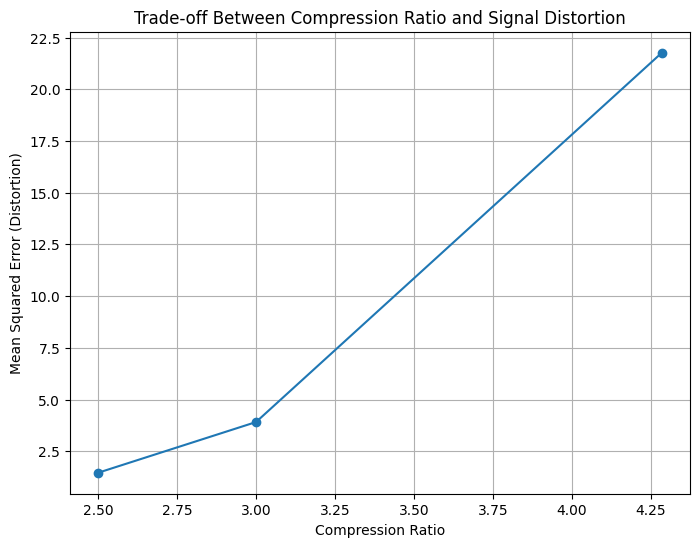

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Original Signal
signal = np.array([8, 16, 24, 32, 40, 48])
signal = np.tile(signal, 5)  # Increase the number of samples by repeating the signal

# Function for compression, reconstruction, and analysis
def analyze_tradeoff(signal, thresholds):
    original_size = len(signal)
    results = {"thresholds": [], "compression_ratios": [], "distortions": []}

    for threshold in thresholds:
        # Apply DCT
        dct_coeffs = dct(signal, norm='ortho')

        # Apply Thresholding (Compression)
        compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Calculate Compression Ratio
        compressed_size = np.count_nonzero(compressed_coeffs)
        compression_ratio = original_size / compressed_size

        # Reconstruct Signal
        reconstructed_signal = idct(compressed_coeffs, norm='ortho')

        # Calculate Distortion (MSE)
        mse = np.mean((signal - reconstructed_signal) ** 2)

        # Store Results
        results["thresholds"].append(threshold)
        results["compression_ratios"].append(compression_ratio)
        results["distortions"].append(mse)

    return results

# Perform Analysis for the given Thresholds
thresholds = [5, 10, 15]  # Given threshold values
results = analyze_tradeoff(signal, thresholds)

# Plot Compression Ratio vs. Distortion
plt.figure(figsize=(8, 6))
plt.plot(results["compression_ratios"], results["distortions"], marker='o')
plt.title("Trade-off Between Compression Ratio and Signal Distortion")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Squared Error (Distortion)")
plt.grid()
plt.show()
